Start by deleting empty and unknown columns in the data

In [23]:
!pip install plotly

In [22]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sbs
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/Bogra.csv')
df.drop(columns=['Unnamed: 0_x','preciptype','snow','snowdepth','windgust','severerisk','stations','Unnamed: 0_y','Unnamed: 0'],inplace=True)
df.head()

,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
0,2013-02-01,Bogra,21.1,11.1,15.0,21.1,11.1,15.0,8.1,64.3,...,3,24.2,11.6,18.2,18.4,0.0,0.0,0.0,8.2,2.09
1,2013-02-02,Bogra,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,...,3,26.1,10.6,19.5,19.3,0.0,0.0,0.0,9.3,3.64
2,2013-02-03,Bogra,27.2,12.1,18.3,26.8,12.1,18.2,6.1,47.2,...,1,26.8,12.8,19.6,19.2,0.0,0.0,0.0,10.2,3.82
3,2013-02-04,Bogra,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,...,1,27.1,12.6,20.0,20.4,0.0,0.0,0.0,8.4,3.44
4,2013-02-05,Bogra,30.5,13.0,21.1,28.8,13.0,20.7,9.2,49.9,...,0,28.1,13.5,20.9,21.2,0.0,0.0,0.0,8.9,3.75


In [13]:
df.columns

Index(['datetime', 'name', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed_x', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'river_discharge', 'weathercode', 'tempmax_y', 'tempmin_y',
       'temperature_2m_mean', 'apparent_temperature_mean', 'precipitation_sum',
       'rain_sum', 'precipitation_hours', 'windspeed_y',
       'et0_fao_evapotranspiration'],
      dtype='object')

In [16]:
df.head()

,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
0,2013-02-01,Bogra,21.1,11.1,15.0,21.1,11.1,15.0,8.1,64.3,...,3,24.2,11.6,18.2,18.4,0.0,0.0,0.0,8.2,2.09
1,2013-02-02,Bogra,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,...,3,26.1,10.6,19.5,19.3,0.0,0.0,0.0,9.3,3.64
2,2013-02-03,Bogra,27.2,12.1,18.3,26.8,12.1,18.2,6.1,47.2,...,1,26.8,12.8,19.6,19.2,0.0,0.0,0.0,10.2,3.82
3,2013-02-04,Bogra,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,...,1,27.1,12.6,20.0,20.4,0.0,0.0,0.0,8.4,3.44
4,2013-02-05,Bogra,30.5,13.0,21.1,28.8,13.0,20.7,9.2,49.9,...,0,28.1,13.5,20.9,21.2,0.0,0.0,0.0,8.9,3.75


## Looking for missing values and fulling em

In [25]:
df.isnull().sum()/len(df)*100

datetime                      0.0
name                          0.0
tempmax_x                     0.0
tempmin_x                     0.0
temp                          0.0
feelslikemax                  0.0
feelslikemin                  0.0
feelslike                     0.0
dew                           0.0
humidity                      0.0
precip                        0.0
precipprob                    0.0
precipcover                   0.0
windspeed_x                   0.0
winddir                       0.0
sealevelpressure              0.0
cloudcover                    0.0
visibility                    0.0
solarradiation                0.0
solarenergy                   0.0
uvindex                       0.0
sunrise                       0.0
sunset                        0.0
moonphase                     0.0
conditions                    0.0
description                   0.0
icon                          0.0
river_discharge               0.0
weathercode                   0.0
tempmax_y     

In [31]:
df.dtypes

datetime                       object
name                           object
tempmax_x                     float64
tempmin_x                     float64
temp                          float64
feelslikemax                  float64
feelslikemin                  float64
feelslike                     float64
dew                           float64
humidity                      float64
precip                        float64
precipprob                      int64
precipcover                   float64
windspeed_x                   float64
winddir                       float64
sealevelpressure              float64
cloudcover                    float64
visibility                    float64
solarradiation                float64
solarenergy                   float64
uvindex                         int64
sunrise                        object
sunset                         object
moonphase                     float64
conditions                     object
description                    object
icon        

we notice there isn't alot of missing values let's fill em!

In [24]:
visibility = df['visibility']
sealevelpressure = df['sealevelpressure']
visibility.fillna(visibility.mean(),inplace=True)
sealevelpressure.fillna(sealevelpressure.mean(),inplace=True)

### Checking for outlier

In [36]:
df.columns

Index(['datetime', 'name', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed_x', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'river_discharge', 'weathercode', 'tempmax_y', 'tempmin_y',
       'temperature_2m_mean', 'apparent_temperature_mean', 'precipitation_sum',
       'rain_sum', 'precipitation_hours', 'windspeed_y',
       'et0_fao_evapotranspiration'],
      dtype='object')

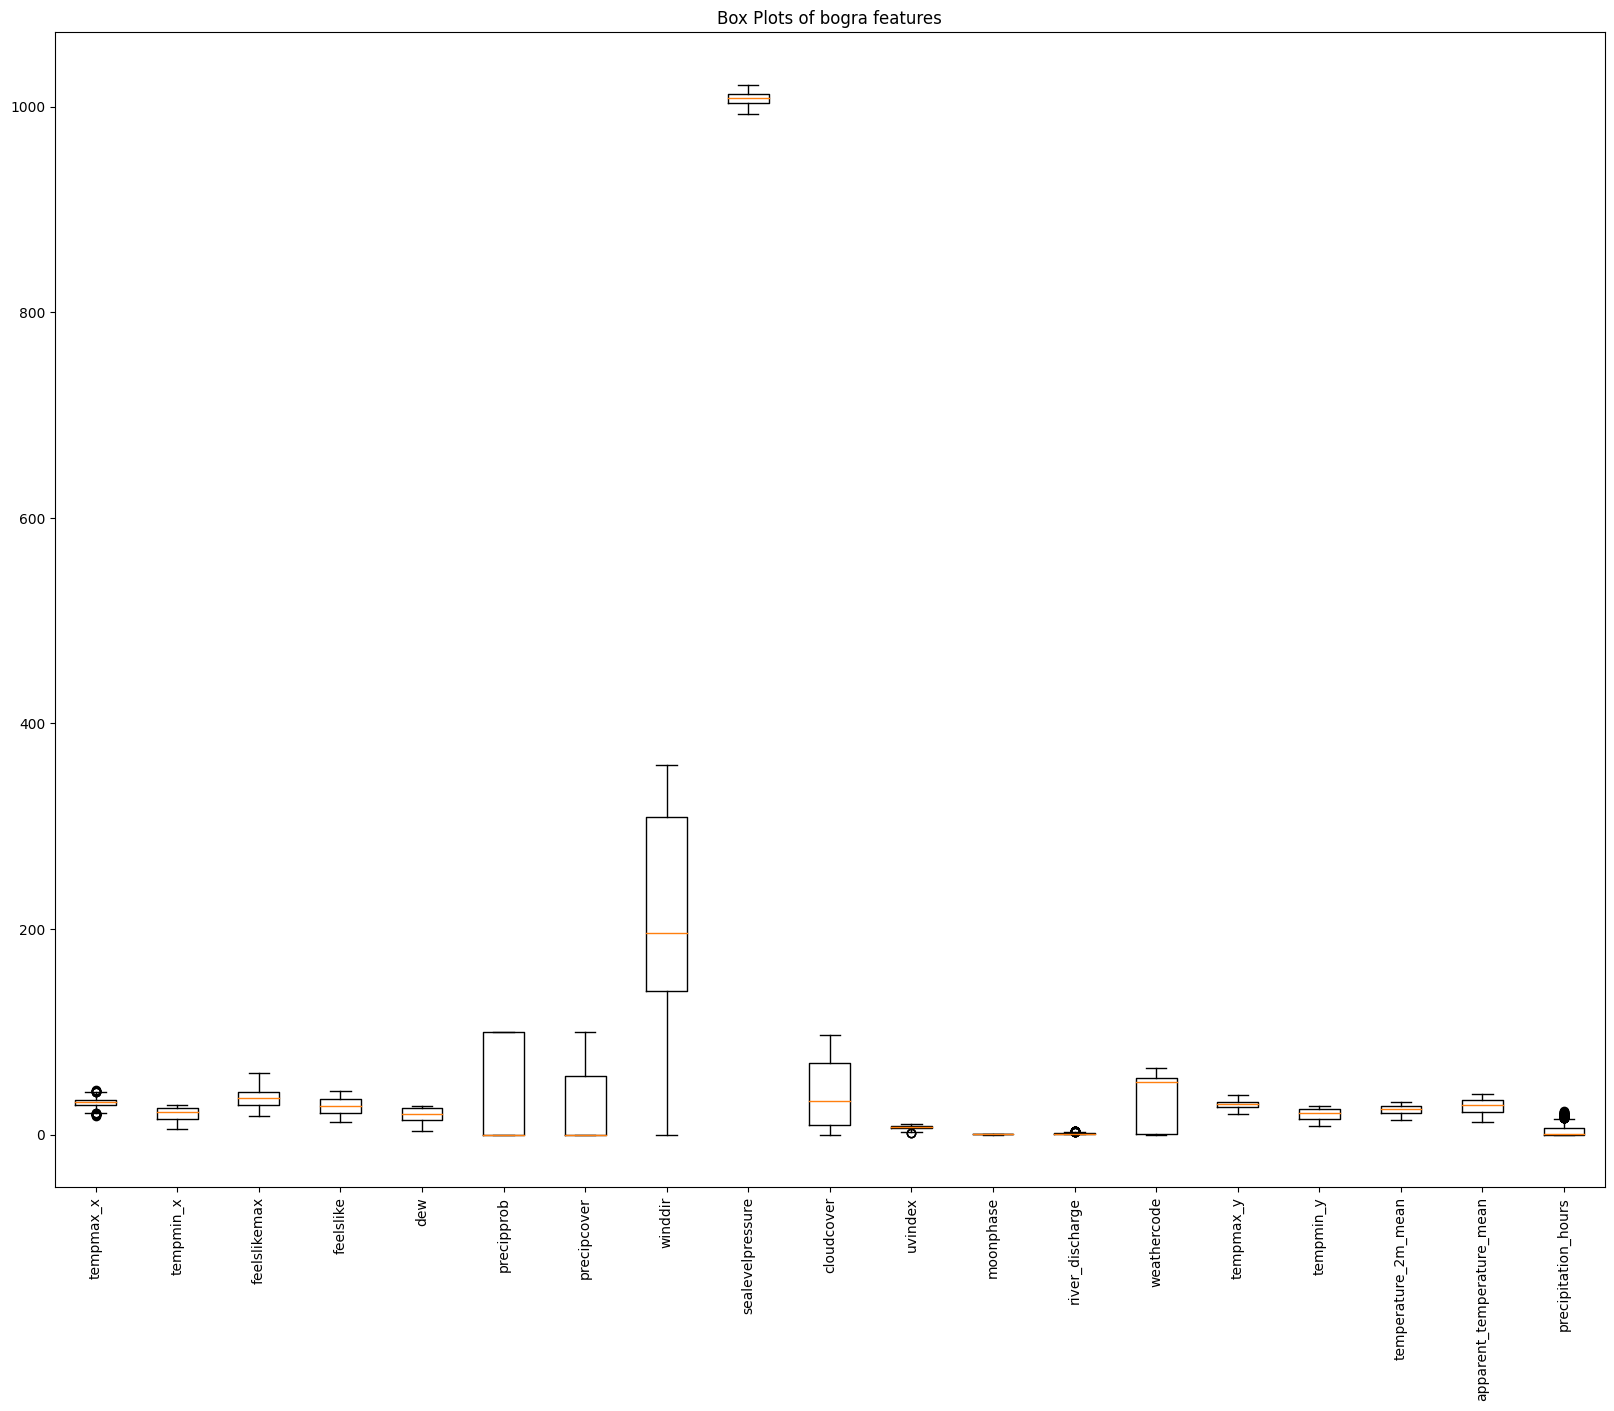

In [39]:
#box plot for each feature
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 15))
plt.boxplot(numeric_columns.values,labels=numeric_columns.columns)
plt.title("Box Plots of bogra features")
plt.xticks(rotation=90)
plt.show()

In [40]:
columns_having_outliers = ['temp','feelslikemin','humidity','precip','windspeed','windspeed_x','solarradiation','solarenergy','unindex','visibility',
                           'precipitation_sum','rain_sum','et0_fao_evapotranspiration','windspeed_y','precipitation_hours']

In [41]:
def remove_outliers(data, columns_having_outliers, threshold=1.5):
    data_no_outliers = data.copy()
    for column in columns_having_outliers:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
    return data_no_outliers
df=remove_outliers(df, columns_having_outliers)
df.shape

(1785, 38)

In [42]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
datetime,,,,,,,,,,,,,,,,,,,,,
2013-02-01,Bogra,21.1,11.1,15.0,21.1,11.1,15.0,8.1,64.3,0.0,...,3,24.2,11.6,18.2,18.4,0.0,0.0,0.0,8.2,2.09
2013-02-02,Bogra,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,0.0,...,3,26.1,10.6,19.5,19.3,0.0,0.0,0.0,9.3,3.64
2013-02-04,Bogra,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,0.0,...,1,27.1,12.6,20.0,20.4,0.0,0.0,0.0,8.4,3.44
2013-02-06,Bogra,31.6,14.4,22.3,30.1,14.4,22.0,11.0,51.8,0.0,...,1,28.7,14.0,21.8,21.6,0.0,0.0,0.0,11.0,4.15
2013-02-07,Bogra,31.8,17.4,23.6,30.5,17.4,23.3,12.5,51.7,0.0,...,2,28.9,15.5,22.5,23.0,0.0,0.0,0.0,12.7,3.93


### Correlation analysis to detect if there is useless collumns to drop

In [45]:
numerical_columns = df.select_dtypes(include=['float64','int64'])
numerical_columns

,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
datetime,,,,,,,,,,,,,,,,,,,,,
2013-02-01,21.1,11.1,15.0,21.1,11.1,15.0,8.1,64.3,0.0,0,...,3,24.2,11.6,18.2,18.4,0.0,0.0,0.0,8.2,2.09
2013-02-02,26.7,9.2,17.3,26.7,7.6,17.1,7.6,56.0,0.0,0,...,3,26.1,10.6,19.5,19.3,0.0,0.0,0.0,9.3,3.64
2013-02-04,28.7,11.5,19.8,27.3,11.5,19.6,8.0,50.1,0.0,0,...,1,27.1,12.6,20.0,20.4,0.0,0.0,0.0,8.4,3.44
2013-02-06,31.6,14.4,22.3,30.1,14.4,22.0,11.0,51.8,0.0,0,...,1,28.7,14.0,21.8,21.6,0.0,0.0,0.0,11.0,4.15
2013-02-07,31.8,17.4,23.6,30.5,17.4,23.3,12.5,51.7,0.0,0,...,2,28.9,15.5,22.5,23.0,0.0,0.0,0.0,12.7,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,25.2,12.0,17.2,25.2,12.0,17.2,13.6,81.5,0.0,0,...,0,23.8,12.7,17.8,17.0,0.0,0.0,0.0,15.2,3.04
2022-01-01,25.2,12.9,17.2,25.2,12.9,17.2,13.6,81.7,0.0,0,...,1,23.1,12.7,17.4,17.3,0.0,0.0,0.0,8.5,2.50
2022-01-04,22.4,10.1,15.8,22.4,10.1,15.8,11.5,77.9,0.0,0,...,0,23.5,12.0,17.3,17.1,0.0,0.0,0.0,9.0,2.83


<ipython-input-53-f62b7ab2cf7b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


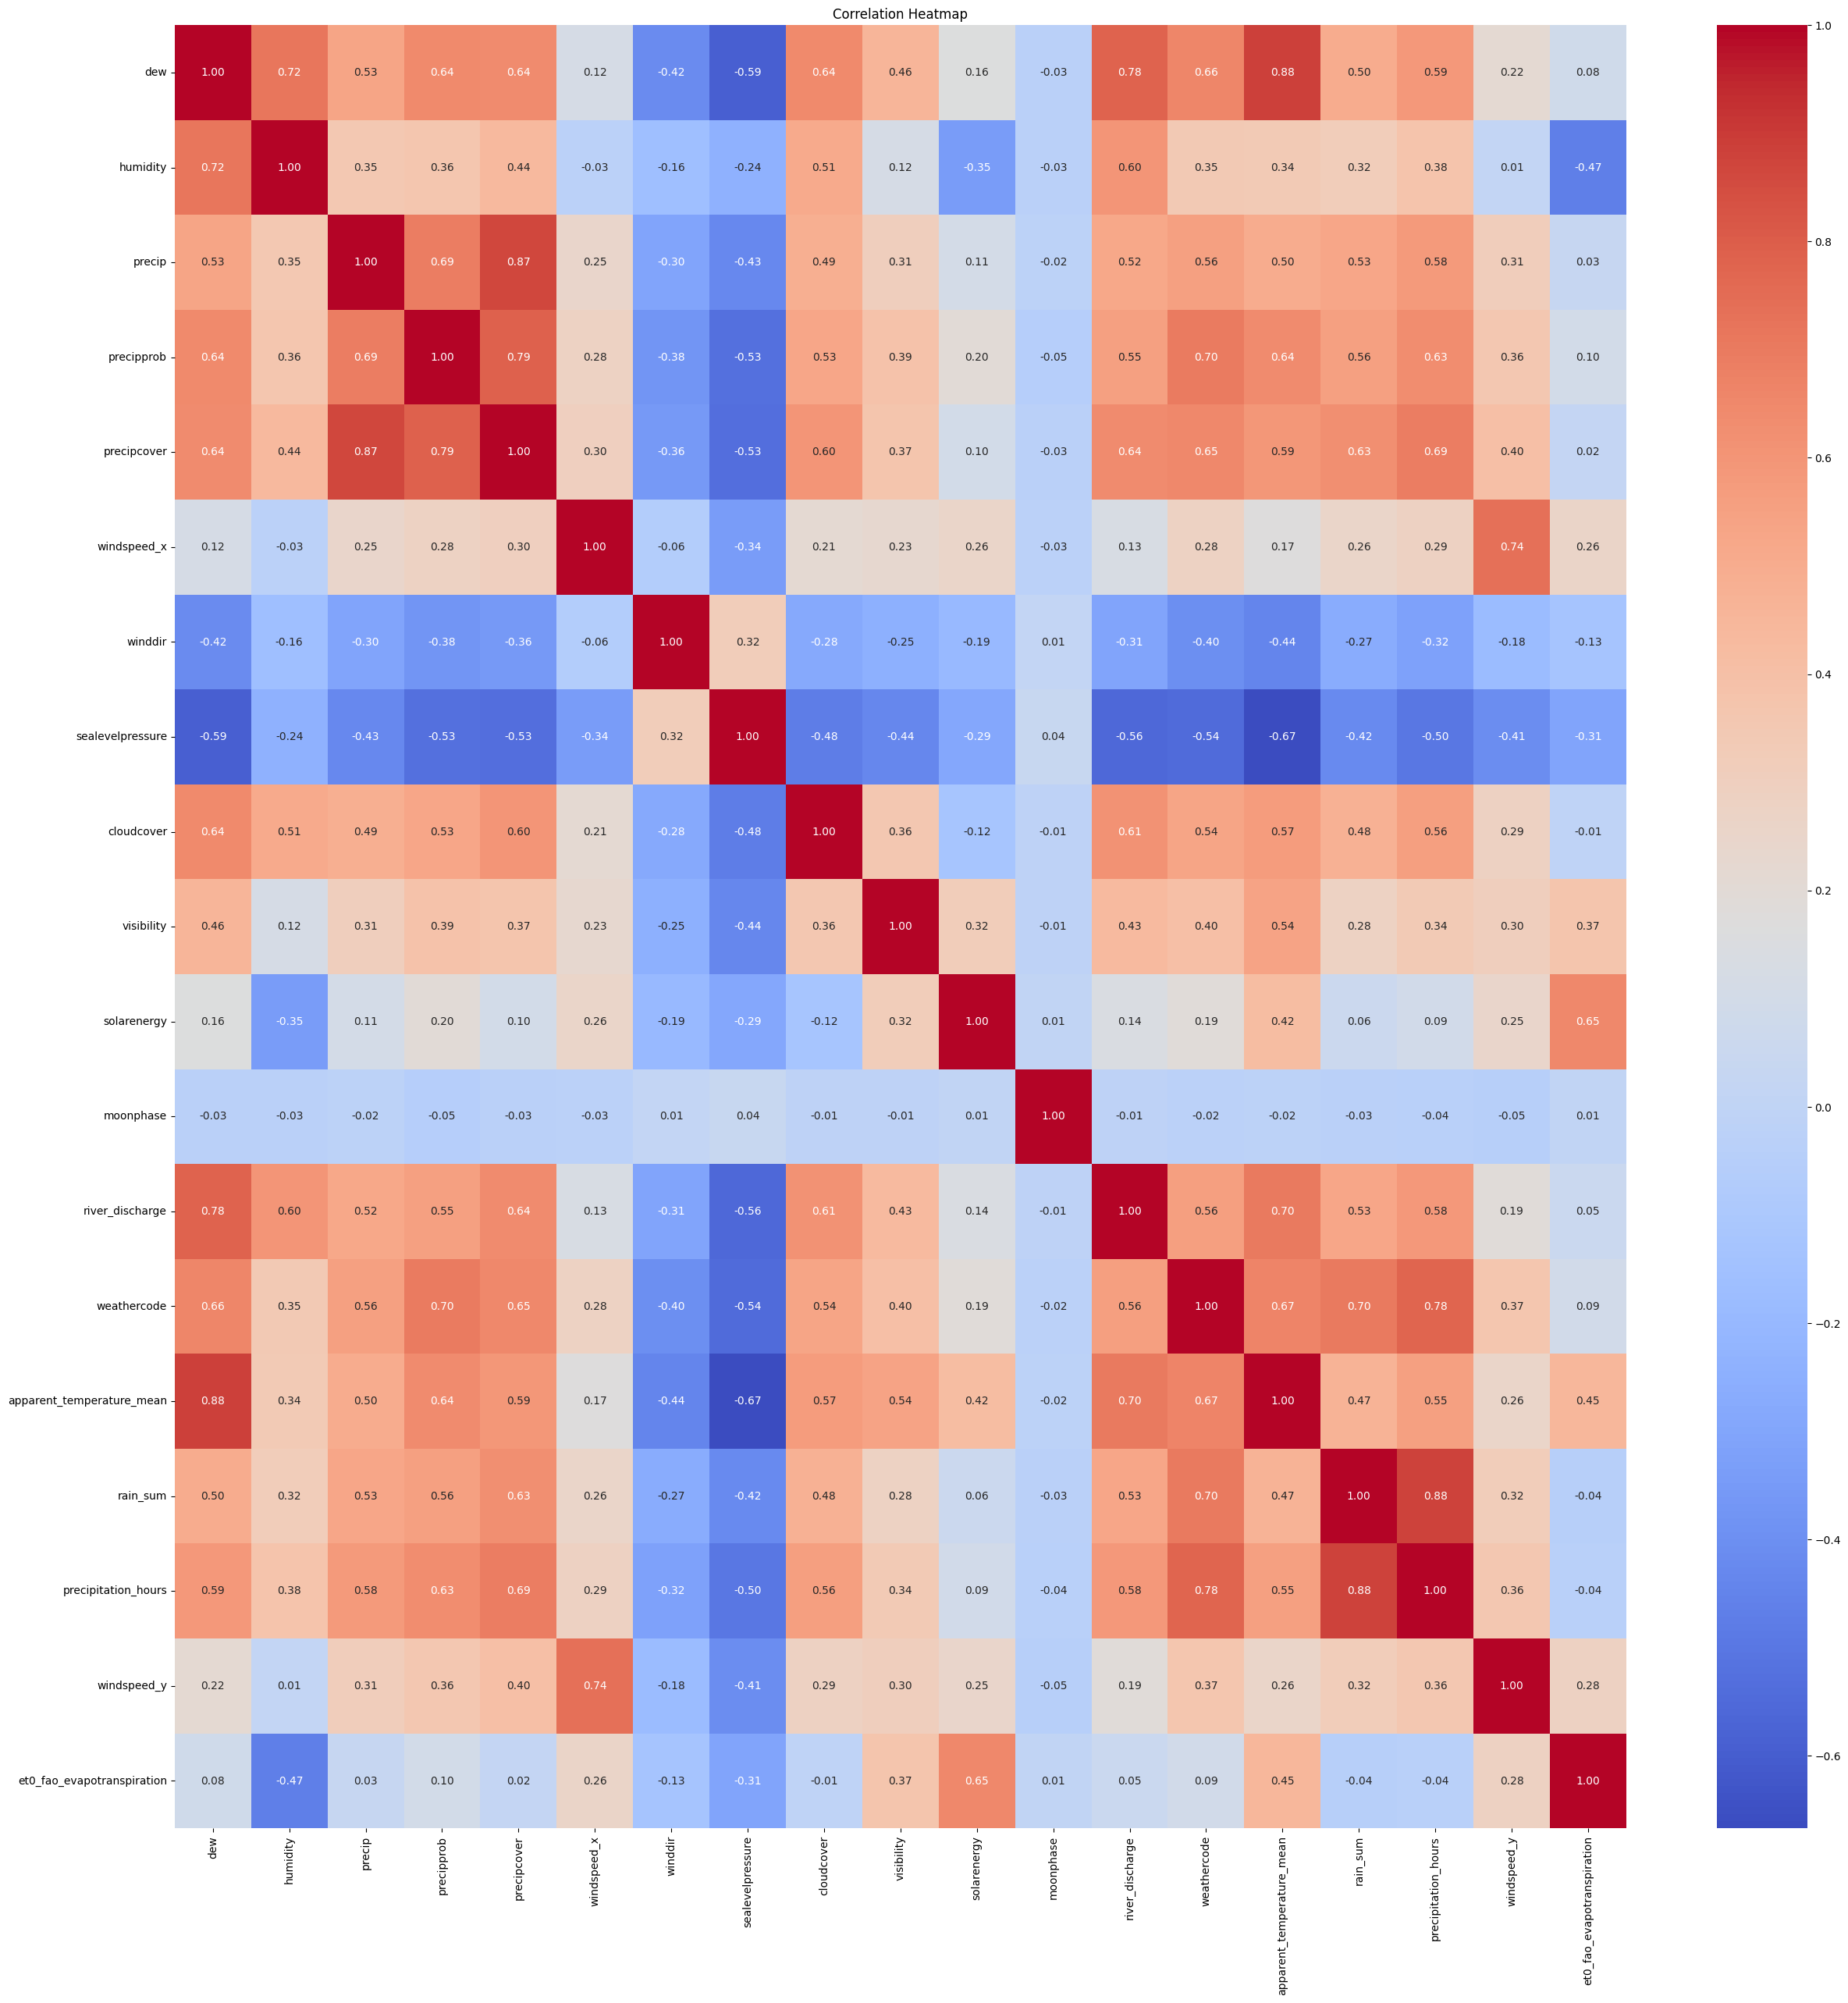

In [53]:
#creating heatmap
plt.figure(figsize=(30,30))
correlation_matrix = df.corr()
sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [51]:
df.drop(columns=['temp','feelslikemin','tempmax_x', 'tempmin_x','tempmax_y', 'tempmin_y','precipitation_sum','feelslike','temperature_2m_mean','solarradiation','feelslikemax','uvindex'],inplace=True)

### **Univariate Analysis**

In [54]:
df.describe()

,dew,humidity,precip,precipprob,precipcover,windspeed_x,winddir,sealevelpressure,cloudcover,visibility,solarenergy,moonphase,river_discharge,weathercode,apparent_temperature_mean,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
count,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000
mean,18.170028,70.647843,1.134678,38.879552,18.363675,12.577367,221.147003,1009.051148,32.580840,4.222073,18.085602,0.482207,0.882885,22.420168,26.638768,0.801064,2.005042,10.463249,3.683395
std,6.226733,14.157801,2.063086,48.761334,29.150118,3.821109,102.594998,5.124401,29.266024,0.459717,4.050357,0.287747,0.579188,25.968924,6.396919,1.537019,3.282901,3.101772,0.897285
min,3.600000,26.700000,0.000000,0.000000,0.000000,4.300000,0.000000,994.100000,0.000000,3.200000,5.100000,0.000000,0.370000,0.000000,12.600000,0.000000,0.000000,4.300000,1.210000
25%,13.000000,60.300000,0.000000,0.000000,0.000000,9.700000,141.500000,1004.500000,6.100000,4.000000,14.900000,0.230000,0.440000,1.000000,21.100000,0.000000,0.000000,8.200000,3.030000
50%,18.100000,75.200000,0.000000,0.000000,0.000000,11.900000,230.600000,1009.800000,22.800000,4.100000,17.700000,0.500000,0.590000,3.000000,26.600000,0.000000,0.000000,9.700000,3.560000
75%,24.400000,82.400000,1.400000,100.000000,33.330000,14.800000,316.900000,1013.200000,57.800000,4.500000,21.200000,0.740000,1.200000,51.000000,33.100000,0.800000,3.000000,12.200000,4.240000
max,28.000000,91.600000,8.700000,100.000000,100.000000,24.100000,359.700000,1019.900000,95.700000,5.400000,27.700000,0.980000,3.350000,63.000000,39.100000,6.900000,15.000000,20.100000,6.000000


In [66]:
num_zeros_per_column = (df == 0).sum()/len(df)
num_zeros_per_column

name                          0.000000
dew                           0.000000
humidity                      0.000000
precip                        0.611204
precipprob                    0.611204
precipcover                   0.611204
windspeed_x                   0.000000
winddir                       0.000560
sealevelpressure              0.000000
cloudcover                    0.068908
visibility                    0.000000
solarenergy                   0.000000
sunrise                       0.000000
sunset                        0.000000
moonphase                     0.033053
conditions                    0.000000
icon                          0.000000
river_discharge               0.000000
weathercode                   0.154622
apparent_temperature_mean     0.000000
rain_sum                      0.602801
precipitation_hours           0.602801
windspeed_y                   0.000000
et0_fao_evapotranspiration    0.000000
dtype: float64

In [55]:
weather_conditions = df['conditions'].value_counts().reset_index()
weather_conditions.columns = ['Condition', 'Count']
weather_conditions = weather_conditions.sort_values(by='Count', ascending=False)
fig = px.pie(weather_conditions, names='Condition', values='Count', title='Bogra Common Weather Conditions',template='plotly_dark')
fig.show()

In [58]:
fig=px.histogram(df,x='icon',nbins=30,title='Distribution of Icon',template='plotly_dark')
fig.update_layout(width=800, height=600)
fig.show()

the collumn description gives same info as the icon colllumn so we can drop it

In [61]:
df.drop(columns=['description'],inplace=True)

In [64]:
df.columns

Index(['name', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed_x', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarenergy', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'icon', 'river_discharge', 'weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration'],
      dtype='object')

### Inspecting Timeseries data for seasonalities or trends or noise

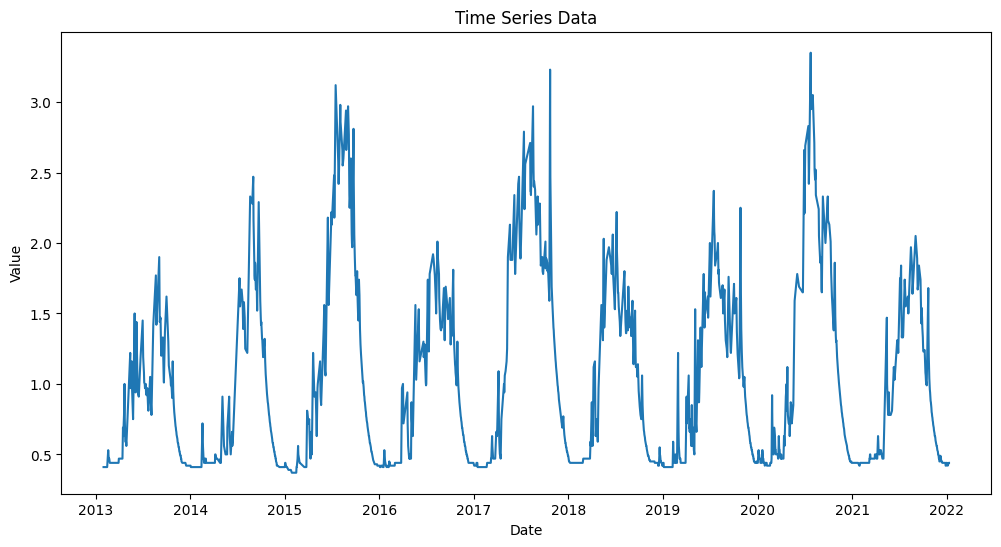

In [68]:
# Assuming df is your DataFrame with 'datetime' and 'value' columns
plt.figure(figsize=(12, 6))
plt.plot(df['river_discharge'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Smoothing out the fluctuations by calculating moving average

In [69]:
df['rolling_mean'] = df['river_discharge'].rolling(window=30).mean()


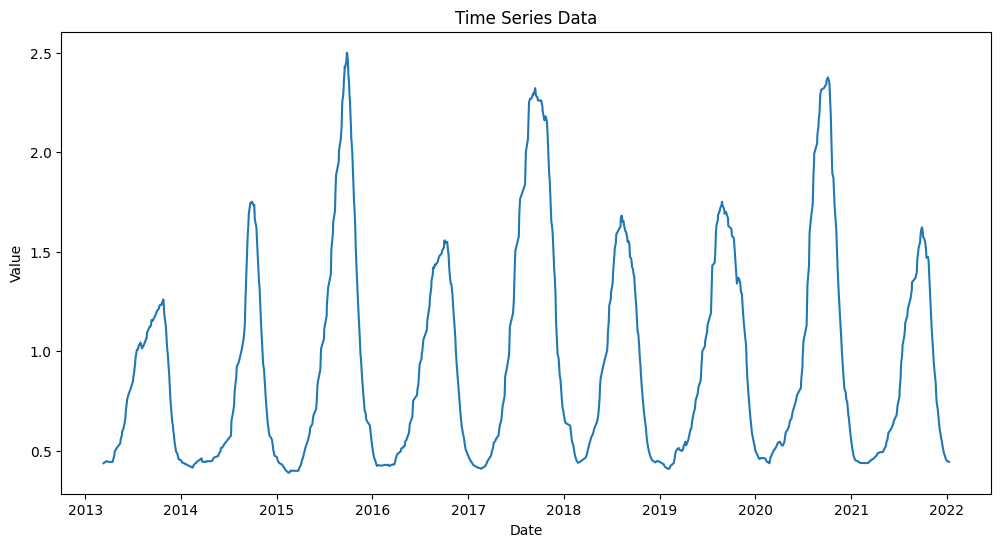

In [70]:
# Assuming df is your DataFrame with 'datetime' and 'value' columns
plt.figure(figsize=(12, 6))
plt.plot(df['rolling_mean'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_period = 8
decomposition = seasonal_decompose(df['river_discharge'], model='additive', period=seasonal_period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

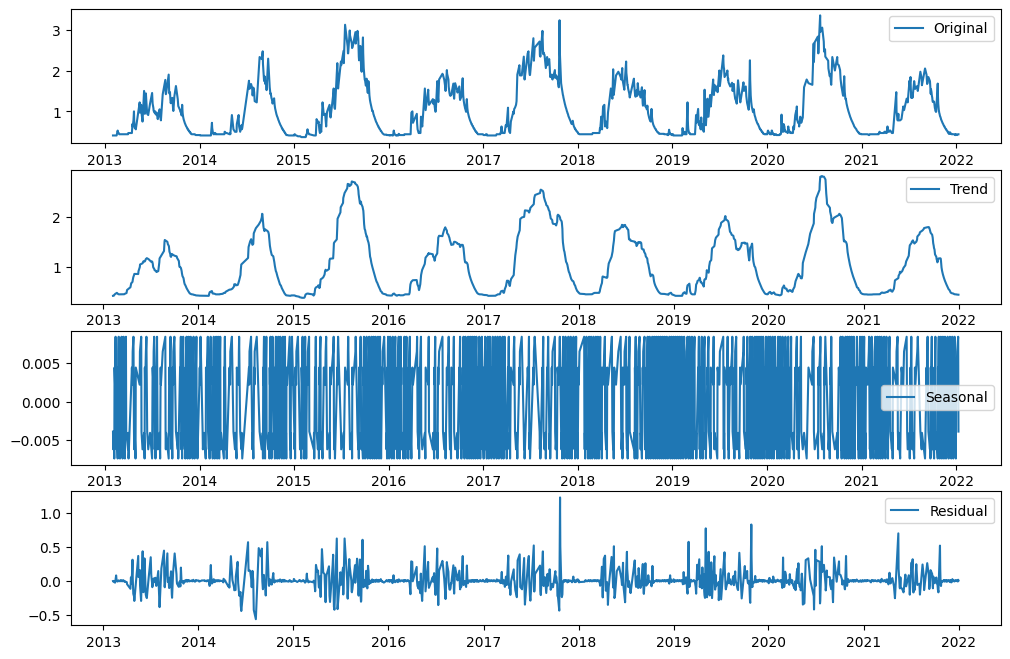

In [119]:
# Visualize the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['river_discharge'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.show()


There is no seasonality nor trend for river discharge

Now, we are checking whether there are columns that exhibit a relationship with river discharge. If we identify a feature that shows a potential linear relationship with river discharge, we can proceed to build a regression model. On the other hand, if there is no apparent linear relationship, we explore other patterns and consider using a machine learning model. Additionally, if the feature displays seasonality, we may apply time series analysis specifically to that feature.

### Scatter plots of all features with river discharge to look for any linear or non linear relashions

In [84]:
df.columns

Index(['name', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed_x', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarenergy', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'icon', 'river_discharge', 'weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'rolling_mean'],
      dtype='object')

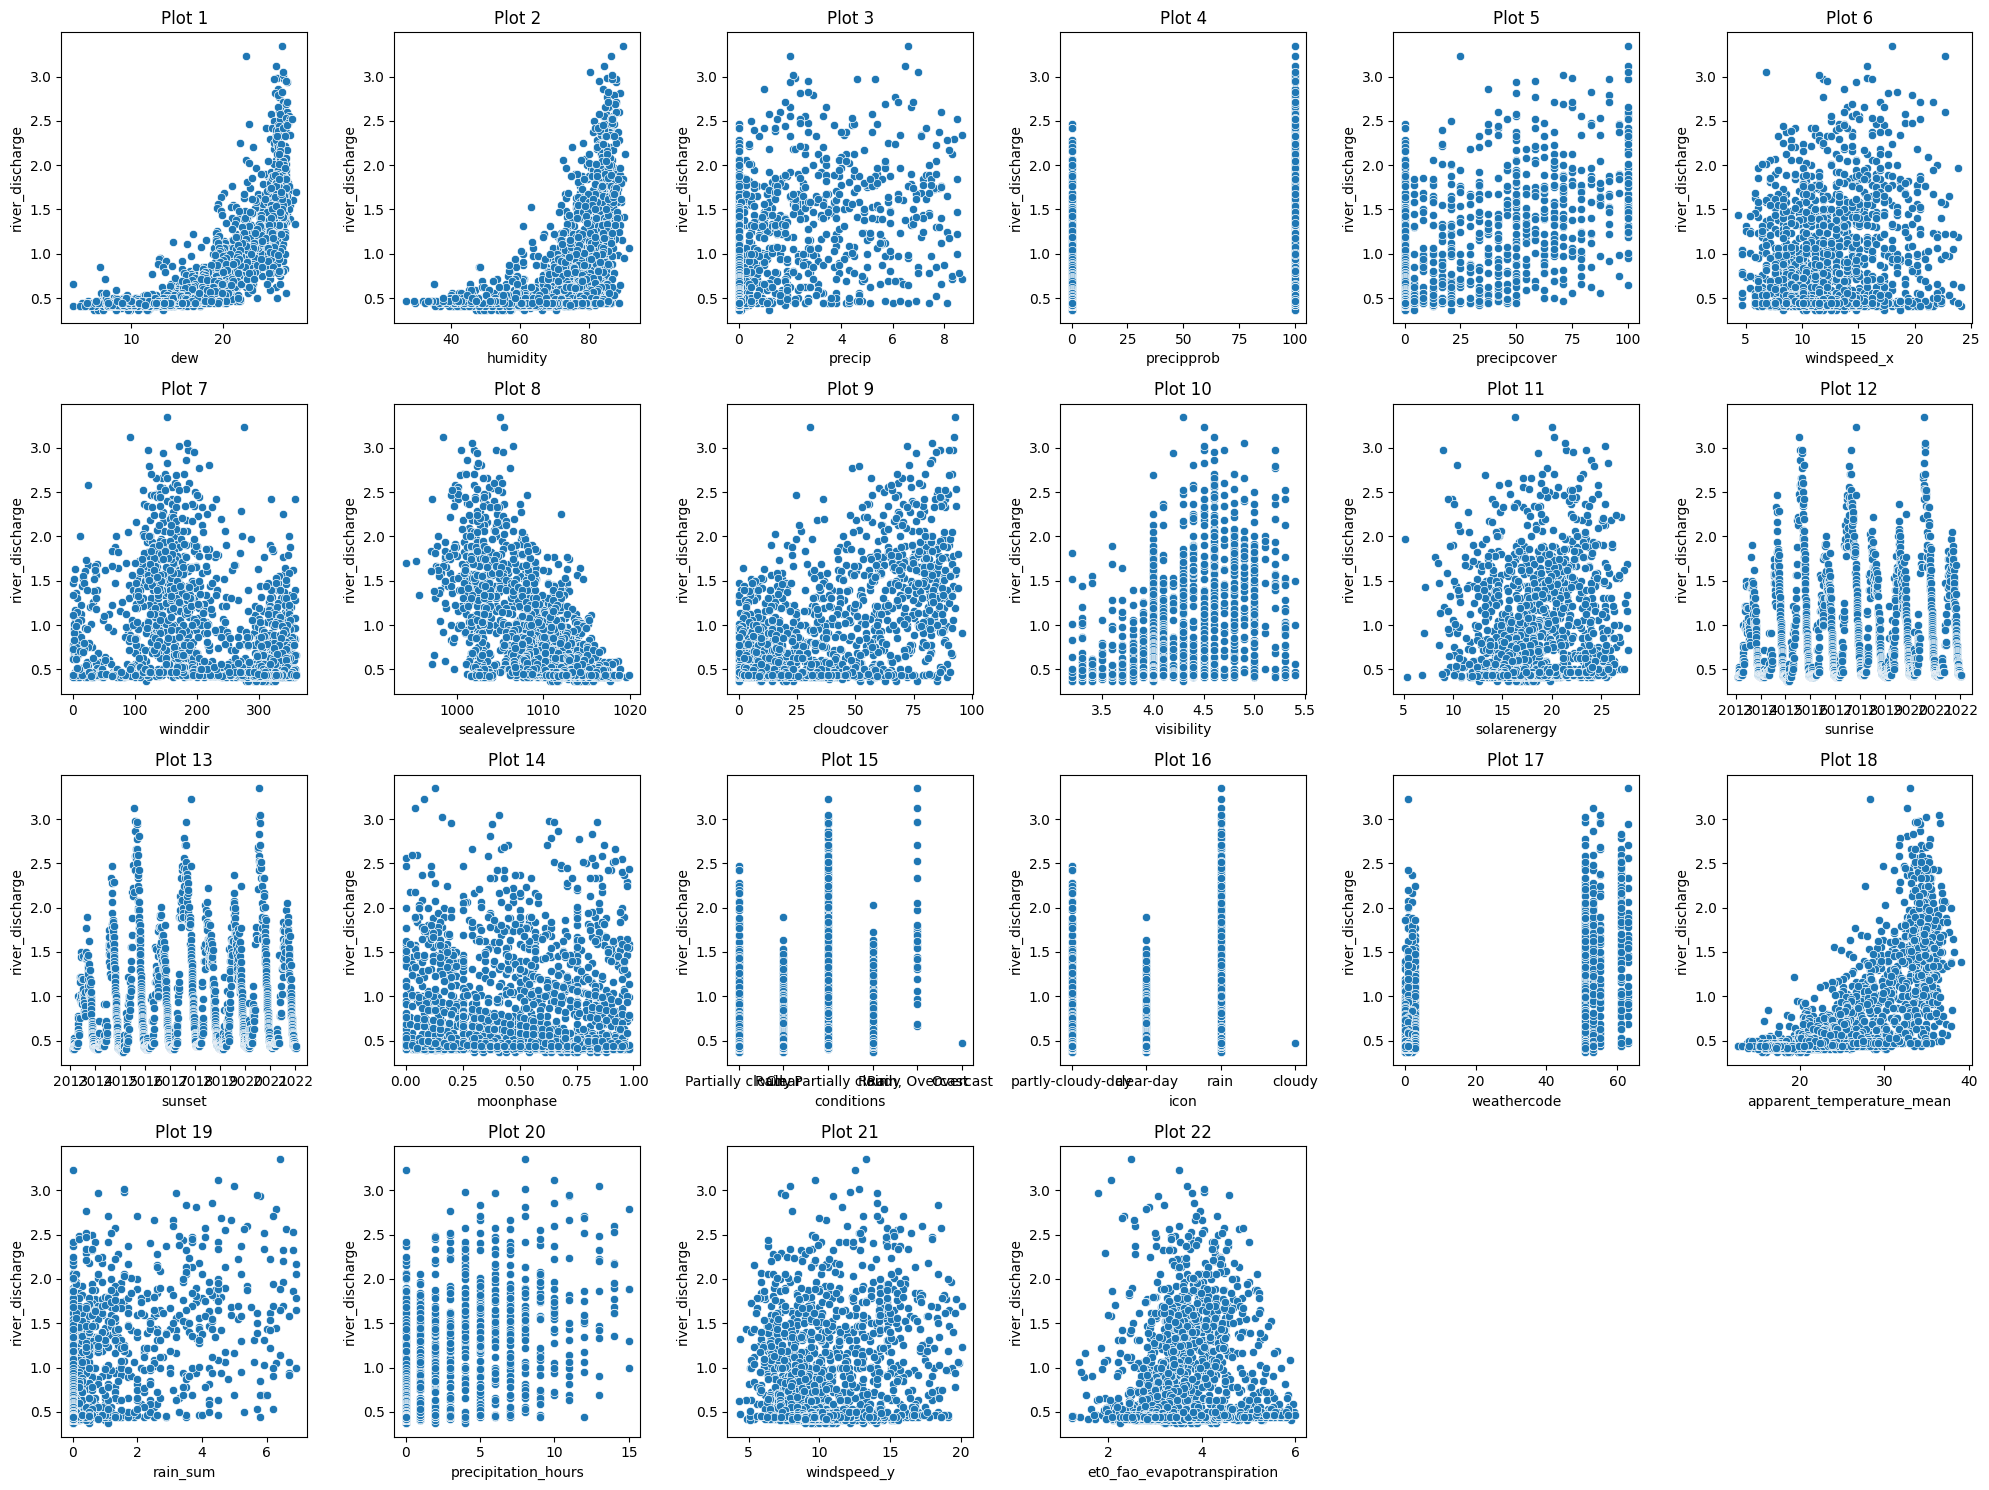

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of 'river_discharge' and 'precipitation_rate':
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
features = ['dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed_x', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarenergy', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'icon', 'weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration']
# Loop through each subplot
for i in range(1, 23):
    plt.subplot(4, 6, i)
    sns.scatterplot(x=features[i-1], y='river_discharge', data=df)
    plt.title(f'Plot {i}')  # Add a title if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [95]:
#sunset and sunrise are dates but with type string let's fix it
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])


In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_period = 7
decomposition = seasonal_decompose(df['sunrise'], model='additive', period=seasonal_period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

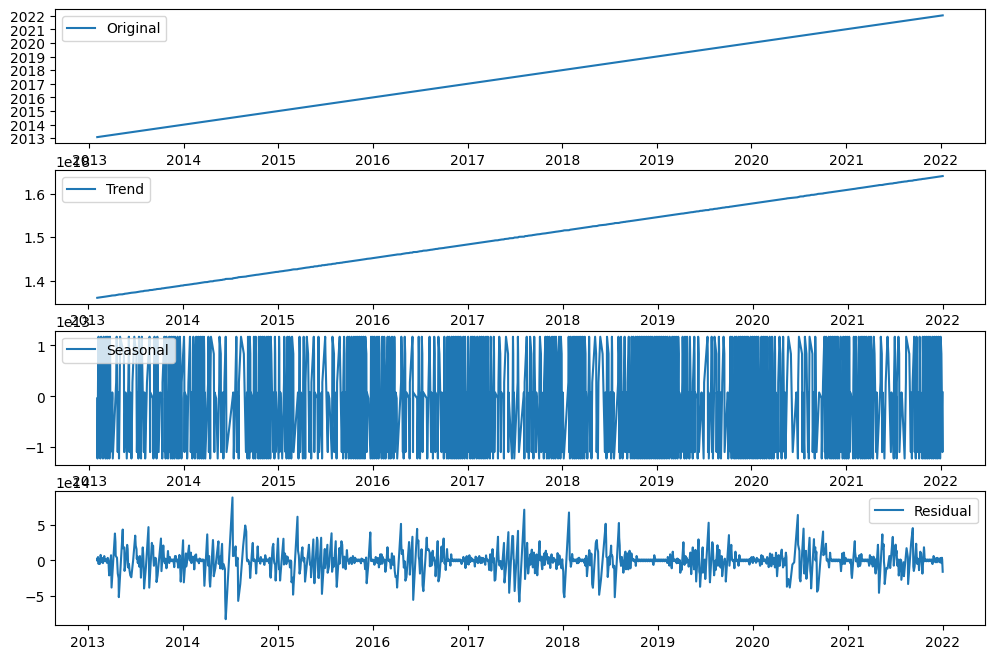

In [103]:
# Visualize the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['sunrise'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.show()


I see a trend but I don't know if it's meaningful

<Axes: xlabel='datetime', ylabel='river_discharge'>

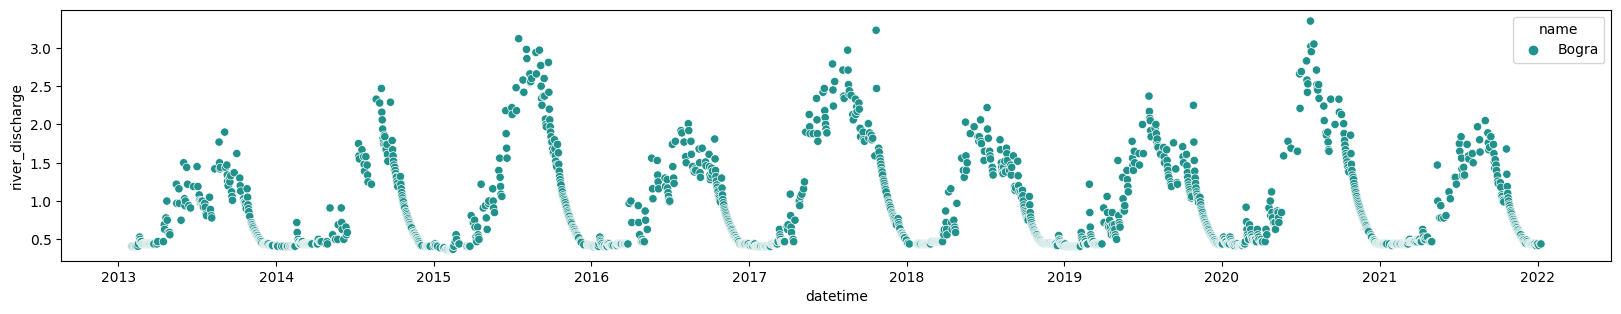

In [108]:

plt.figure(figsize = (20,15))

plt.subplot(4,1,1)
sns.scatterplot(x = 'datetime', y='river_discharge' , hue='name', palette='viridis', data = df)

<Axes: xlabel='sunrise', ylabel='river_discharge'>

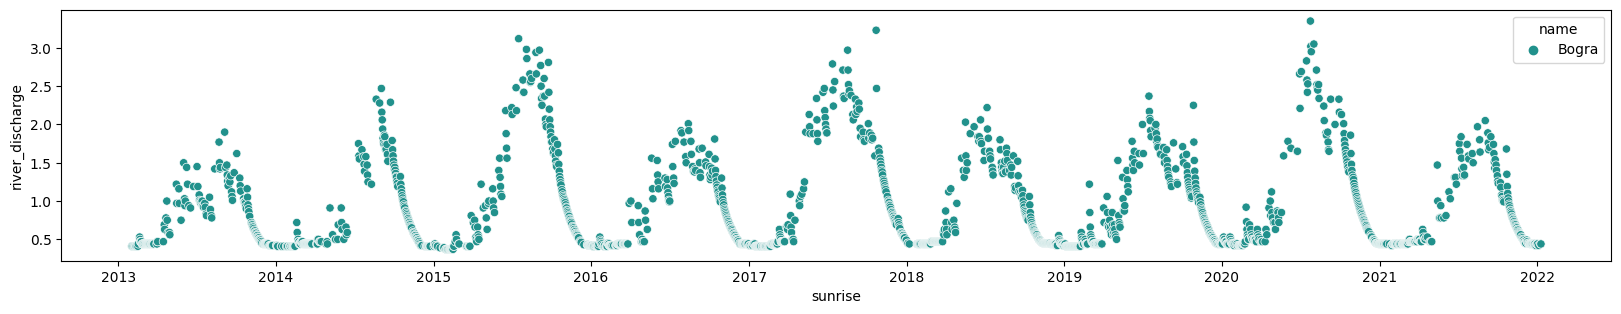

In [106]:

plt.figure(figsize = (20,15))

plt.subplot(4,1,1)
sns.scatterplot(x = 'sunrise', y='river_discharge' , hue='name', palette='viridis', data = df)

Because sunset and sunrize were string they didn't figure out in the heatmap but here we can clearly see that they give same information lets drop sunset because I like the sunrise  <3

In [107]:
df.drop(columns=['sunset'],inplace=True)

So there is no underlying pattern wo we can't leverage the timeseries we can  procede with a ML approach then

In [121]:
df.to_csv('cleaned_Bogra_data.csv', index=False)